In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Flight delay prediction.csv')

Data Preprocessing


In [ ]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay', 'weather'],
      dtype='object')

In [ ]:
df['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [ ]:
df['weather'].value_counts()

Perfect      299119
Imperfect    240264
Name: weather, dtype: int64

In [ ]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
 9   weather      539383 non-null  object
dtypes: int64(6), object(4)
memory usage: 41.2+ MB


In [ ]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
weather        0
dtype: int64

In [ ]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [ ]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,weather
0,1,CO,269,SFO,IAH,3,15,205,1,Imperfect
1,2,US,1558,PHX,CLT,3,15,222,1,Imperfect
2,3,AA,2400,LAX,DFW,3,20,165,1,Imperfect
3,4,AA,2466,SFO,DFW,3,20,195,1,Imperfect
4,5,AS,108,ANC,SEA,3,30,202,0,Perfect


Label Encoding

In [ ]:
# List of categorical columns to be label encoded
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo','weather']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and transform it
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

Feature selection

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Delay','id'])  # Exclude the target column from features
y = df['Delay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest with ANOVA F-value scoring
k_best = SelectKBest(score_func=f_regression, k=8)
# Fit SelectKBest to training data
X_train_kbest = k_best.fit_transform(X_train, y_train)

# Get indices of selected features
selected_indices = k_best.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_indices]

# Evaluate the selected features
# Example: Fit a model and evaluate its performance
model = LinearRegression()
model.fit(X_train_kbest, y_train)
y_pred = model.predict(k_best.transform(X_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Using SelectKBest):", mse)
print("Selected features:", selected_features)

Mean Squared Error (Using SelectKBest): 1.0849515342250246e-29
Selected features: Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'weather'],
      dtype='object')


Train Test Split


In [ ]:
X = df[['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'weather']].values
y = df['Delay'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=5)

Model implementation


Stochastic Gradient Descent (SGD)

In [ ]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

57.42 %


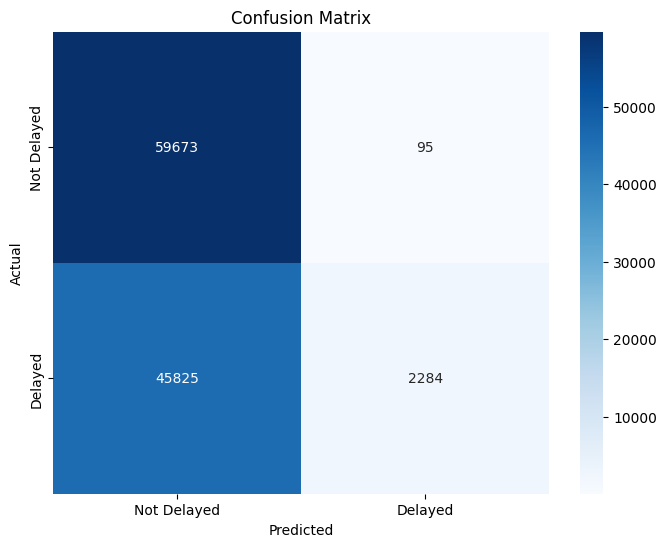

In [ ]:
# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72     59768
           1       0.96      0.05      0.09     48109

    accuracy                           0.57    107877
   macro avg       0.76      0.52      0.41    107877
weighted avg       0.74      0.57      0.44    107877



Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


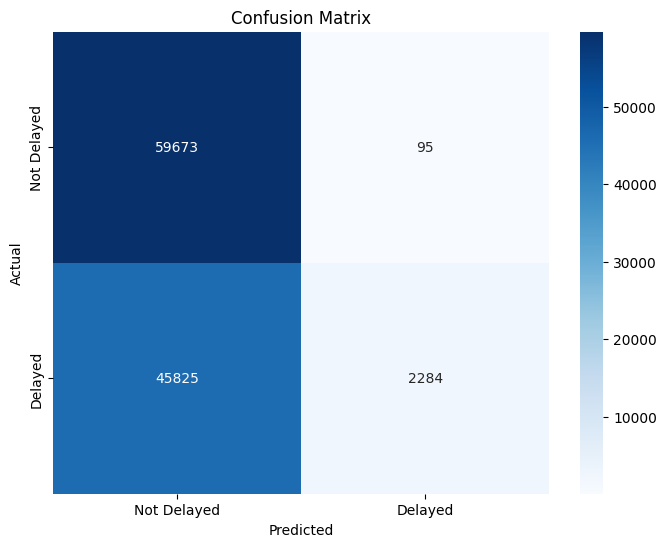

In [ ]:
# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72     59768
           1       0.96      0.05      0.09     48109

    accuracy                           0.57    107877
   macro avg       0.76      0.52      0.41    107877
weighted avg       0.74      0.57      0.44    107877



Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

100.0 %


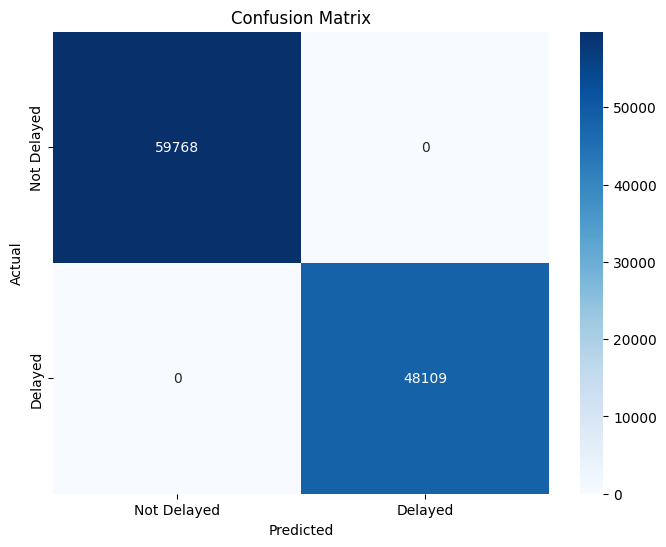

In [ ]:
# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59768
           1       1.00      1.00      1.00     48109

    accuracy                           1.00    107877
   macro avg       1.00      1.00      1.00    107877
weighted avg       1.00      1.00      1.00    107877



K-Nearest Neighbor (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

91.24 %


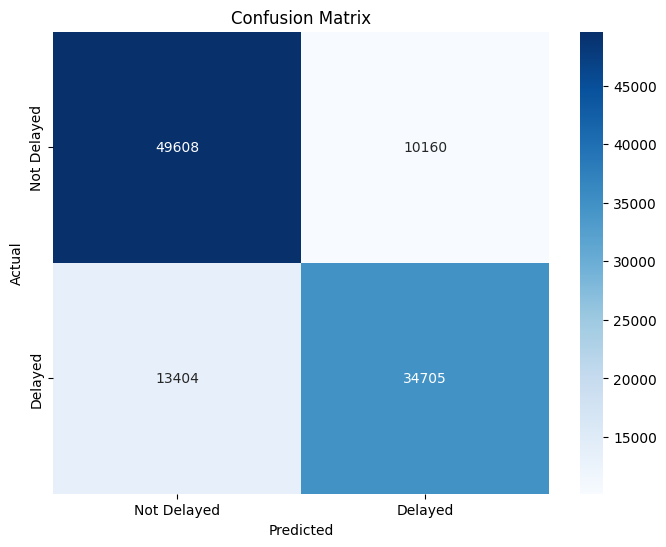

In [ ]:
# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     59768
           1       0.77      0.72      0.75     48109

    accuracy                           0.78    107877
   macro avg       0.78      0.78      0.78    107877
weighted avg       0.78      0.78      0.78    107877



GaussianNB

In [ ]:
nb= GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = round(accuracy_score(y_test, nb_pred)* 100, 2)
print("Naive Bayes Accuracy:", nb_accuracy)
print(round(nb_accuracy,2,), "%")

Naive Bayes Accuracy: 100.0
100.0 %


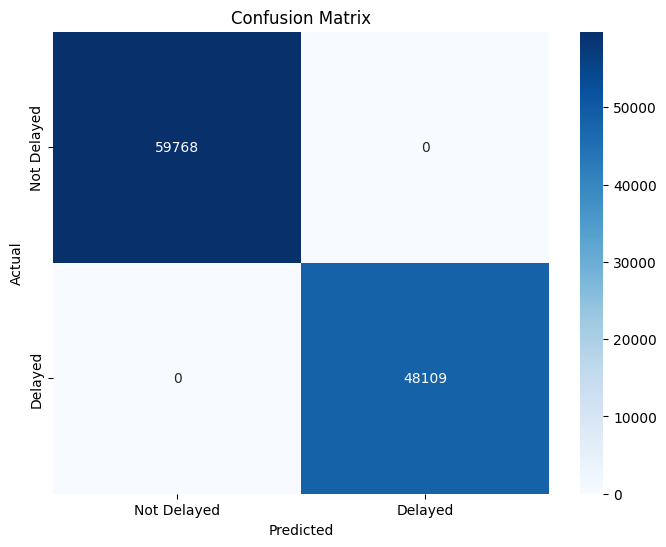

In [ ]:
# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, nb_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, nb_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59768
           1       1.00      1.00      1.00     48109

    accuracy                           1.00    107877
   macro avg       1.00      1.00      1.00    107877
weighted avg       1.00      1.00      1.00    107877



# DecisionTreeClassifier

In [31]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = round(accuracy_score(y_test, dt_pred)* 100, 2)
print("Decision Tree Accuracy:", dt_accuracy)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, dt_pred)

Decision Tree Accuracy: 100.0


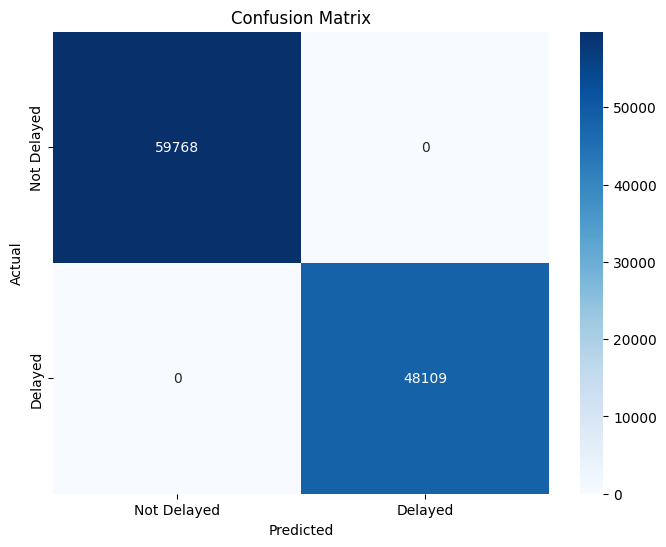

In [32]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, dt_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59768
           1       1.00      1.00      1.00     48109

    accuracy                           1.00    107877
   macro avg       1.00      1.00      1.00    107877
weighted avg       1.00      1.00      1.00    107877



**VOTING CLASSIFIER**

In [43]:
from sklearn.ensemble import VotingClassifier

# Define the individual models
model1 = GaussianNB()
model2 = DecisionTreeClassifier()

# Define the ensemble model
model = VotingClassifier(estimators=[('nb', model1), ('dt', model2)], voting='hard')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
model_pred = model.predict(X_test)

# Calculate accuracy
model_accuracy = round(accuracy_score(y_test, model_pred) * 100, 2)
print("Hybrid Model Accuracy:", model_accuracy,"%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, model_pred))


Hybrid Model Accuracy: 100.0 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59768
           1       1.00      1.00      1.00     48109

    accuracy                           1.00    107877
   macro avg       1.00      1.00      1.00    107877
weighted avg       1.00      1.00      1.00    107877



DEEP Learning

RNN


In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models  # Add this line to import the models submodule

# Assuming X_train, X_test, y_train, y_test are already prepared

# Define the RNN model
model_rnn = models.Sequential([  # This line should work now
    layers.SimpleRNN(32, input_shape=(X_train.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model and calculate accuracy
evaluation_result = model_rnn.evaluate(X_test, y_test)
accuracy_rnn = round(evaluation_result[1] * 100, 2)
print("Accuracy of RNN model:", accuracy_rnn, "%")

3372/3372 [==============================] - 8s 2ms/step - loss: 0.8291 - accuracy: 0.5540
Accuracy of RNN model: 55.4 %


LSTM

In [39]:
# Assuming X_train, X_test, y_train, y_test are already prepared
# Define the LSTM model
model_lstm = models.Sequential([
    layers.LSTM(32, input_shape=(X_train.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
evaluation_result = model_lstm.evaluate(X_test, y_test)
accuracy_lstm = round(evaluation_result[1] * 100, 2)
print("Accuracy of LSTM model:", accuracy_lstm, "%")

3372/3372 [==============================] - 8s 3ms/step - loss: 4.1555e-05 - accuracy: 1.0000
Accuracy of LSTM model: 100.0 %


CNN

In [46]:
# Reshape the input data for CNN
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model_cnn = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model and calculate accuracy
evaluation_result = model_cnn.evaluate(X_test_cnn, y_test)
accuracy_cnn = round(evaluation_result[1] * 100, 2)
print("Accuracy of CNN model:", accuracy_cnn, "%")

3372/3372 [==============================] - 5s 1ms/step - loss: 101.6884 - accuracy: 0.5540
Accuracy of CNN model: 55.4 %


**LSTM with SGD [Hybrid]**

In [48]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

# Assuming X_train, X_test, y_train, y_test are already prepared

# Define the LSTM model
model_lstm = models.Sequential([
    layers.LSTM(32, input_shape=(X_train.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

# Define the SGD optimizer without the decay argument
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Compile the model with SGD optimizer
model_lstm.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
evaluation_result = model_lstm.evaluate(X_test, y_test)
accuracy_lstm = round(evaluation_result[1] * 100, 2)
print("Accuracy of LSTM model with SGD optimizer:", accuracy_lstm, "%")


Epoch 1/10
13485/13485 [==============================] - 89s 6ms/step - loss: 0.0148 - accuracy: 0.9947 - val_loss: 3.0517e-04 - val_accuracy: 1.0000
Epoch 2/10
13485/13485 [==============================] - 75s 6ms/step - loss: 2.0061e-04 - accuracy: 1.0000 - val_loss: 1.3850e-04 - val_accuracy: 1.0000
Epoch 3/10
13485/13485 [==============================] - 79s 6ms/step - loss: 1.0910e-04 - accuracy: 1.0000 - val_loss: 8.7995e-05 - val_accuracy: 1.0000
Epoch 4/10
13485/13485 [==============================] - 80s 6ms/step - loss: 7.4324e-05 - accuracy: 1.0000 - val_loss: 6.3977e-05 - val_accuracy: 1.0000
Epoch 5/10
13485/13485 [==============================] - 80s 6ms/step - loss: 5.6067e-05 - accuracy: 1.0000 - val_loss: 5.0040e-05 - val_accuracy: 1.0000
Epoch 6/10
13485/13485 [==============================] - 80s 6ms/step - loss: 4.4855e-05 - accuracy: 1.0000 - val_loss: 4.0981e-05 - val_accuracy: 1.0000
Epoch 7/10
13485/13485 [==============================] - 79s 6ms/step - l

Comparison Chart

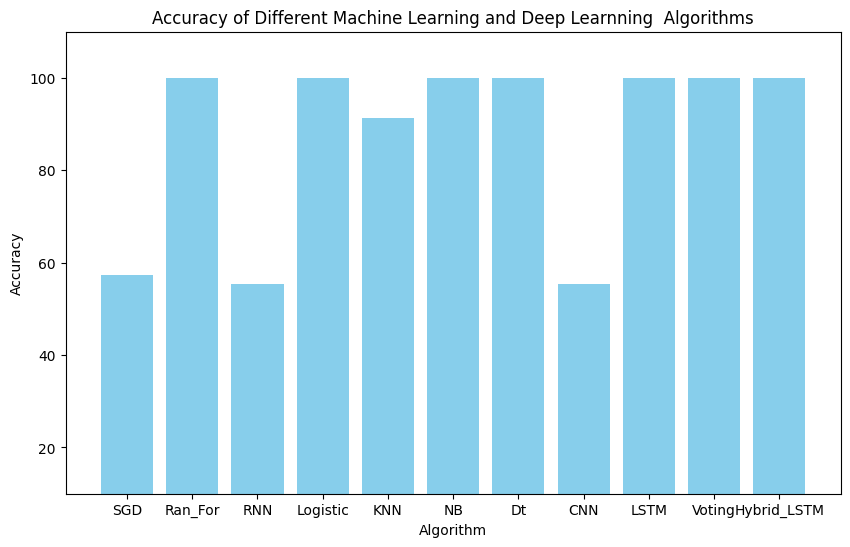

In [50]:
# Assuming you have already trained and evaluated all the models and stored their accuracies
accuracies = {
    'SGD': acc_sgd,
    'Ran_For':acc_random_forest,
    'RNN': acc_random_forest,
    'Logistic': acc_log,
    'KNN': acc_knn,
    'NB': nb_accuracy,
    'Dt': dt_accuracy,
    'CNN': accuracy_cnn,
    'RNN': accuracy_rnn,
    'LSTM': accuracy_lstm,
    'Voting':model_accuracy,
    'Hybrid_LSTM':accuracy_lstm
}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning and Deep Learnning  Algorithms')
plt.ylim(10, 110)  # Set y-axis limits to ensure all accuracies are visible
plt.show()
